In [1]:
import os
import sys
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## for classification

In [2]:
data_names = ['breast_cancer'
             ,'yeast'
             ,'segmentation'
             ,'waveform'
             ,'leaf'
#              ,'wine'
#              ,'crime'
#              ,'airfoil'
#              ,'fire'
#              ,'fish'
             ]
kernel_names = ['linear'
               ,'polynomial'
               ,'hyperbolic_tangent'
               ,'vovks_real_polynomial'
               ,'vovks_infinite_polynomial'
               ,'gaussian'
               ,'laplacian'
               ,'rational_quadratic'
               ,'multiquadratic'
               ,'inverse_multiquadratic'
               ,'circular'
               ,'spherical'
               ,'wave'  
               ,'power'
               ,'log'
               ,'generalized_tstudent'
               ,'anova'
               ,'spline'
               ,'chi_square'
               ,'histogram_intersection'
               ,'hellingers']


In [3]:
os.chdir('result/')

In [4]:
result = pd.DataFrame(columns = ['dataset','kernel','alpha1','alpha2','lambda','epsilon','train_score','valid_score','valid_std'])


for data_name in data_names:
    for data in [x for x in os.listdir() if data_name in x]:
        temp = pd.read_csv(data)
        temp['dataset'] = data_name
        
        result = pd.concat([result,temp], sort = False)
        
result.index = range(len(result))

In [82]:
k = 0.2

In [83]:
result['R'] = 1 - (1/k) * result['valid_std'].apply(lambda x:min(k,x))
result['C-score'] = result['valid_score']**2 + 1 - 2 * result['valid_score'] * 1 * result['R'] 
result['C-score'] = result['C-score'].apply(lambda x : np.sqrt(x))
result.loc[result['R'] == 0,'C-score'] = 100

In [84]:
result.head()

,dataset,kernel,alpha1,alpha2,lambda,epsilon,train_score,valid_score,valid_std,R,C-score
0,breast_cancer,polynomial,2.000,2.000,100.000,0.500,0.989,0.940,0.034,0.828,0.571
1,breast_cancer,power,2.000,2.000,10.000,0.500,0.973,0.966,0.023,0.883,0.478
2,breast_cancer,spherical,1.000,1.000,100.000,0.500,1.000,0.911,0.039,0.805,0.603
3,breast_cancer,anova,0.500,0.500,1.000,0.500,0.984,0.968,0.026,0.870,0.503
4,breast_cancer,laplacian,1.000,1.000,1.000,0.500,0.993,0.965,0.022,0.890,0.461


In [85]:
temp = result.sort_values('C-score', ascending=True).drop_duplicates(['dataset','kernel'])
temp.index = range(len(temp))

In [86]:
temp.head()

,dataset,kernel,alpha1,alpha2,lambda,epsilon,train_score,valid_score,valid_std,R,C-score
0,waveform,anova,0.500,0.500,1.000,0.500,0.895,0.846,0.007,0.964,0.291
1,breast_cancer,linear,0.000,0.000,1.000,0.500,0.973,0.971,0.009,0.953,0.302
2,waveform,polynomial,5.000,5.000,10.000,0.500,1.000,0.819,0.008,0.962,0.308
3,waveform,linear,100.000,100.000,1.000,0.500,0.877,0.867,0.009,0.953,0.315
4,waveform,spherical,5.000,5.000,100.000,0.500,1.000,0.809,0.008,0.960,0.318


In [87]:
txt = open('/Users/000namc/github/python-sklearn-svm-kernels/ensemble/parameter_classification.txt','wt')

for data_name in data_names:
    
    tmp = temp[temp['dataset'] == data_name].copy()
    tmp.index = range(len(tmp))
    
    for i in range(10):
        txt.write('python evaluate.py ' + data_name + ' ' + tmp.loc[i,'kernel'] + ' ' + str(tmp.loc[i,'alpha1']) + ' ' + str(tmp.loc[i,'alpha2']) + ' ' + str(tmp.loc[i,'lambda']) + ' ' + str(tmp.loc[i,'epsilon']) + '\n')
                
txt.close()


In [88]:
results = pd.DataFrame(columns = ['dataset'] + kernel_names)
results['dataset'] = data_names

for data_name in data_names:
    for kernel_name in kernel_names:
        try:
            condition1 = temp['dataset'] == data_name
            condition2 = temp['kernel'] == kernel_name
            results.loc[results['dataset'] == data_name,kernel_name] = str(round(temp.loc[condition1 & condition2,'valid_score'],4).values[0]) + '/' + str(round(temp.loc[condition1 & condition2,'R'],4).values[0])
        except:
            results.loc[results['dataset'] == data_name,kernel_name] = '0/0'

In [89]:
# results = pd.DataFrame(columns = ['dataset'] + kernel_names)
# results['dataset'] = data_names

# for data_name in data_names:
#     for kernel_name in kernel_names:

#         condition1 = temp['dataset'] == data_name
#         condition2 = temp['kernel'] == kernel_name
#         if round(temp.loc[condition1 & condition2,'valid_score'],4).values[0] != -1:
#             results.loc[results['dataset'] == data_name,kernel_name] = str(round(temp.loc[condition1 & condition2,'valid_score'],4).values[0]) + '/' + str(round(temp.loc[condition1 & condition2,'R'],4).values[0])
#         else:
#             results.loc[results['dataset'] == data_name,kernel_name] = '0/0'

In [90]:
results.to_csv('classification.csv',index = False)

In [91]:
results

,dataset,linear,polynomial,hyperbolic_tangent,vovks_real_polynomial,vovks_infinite_polynomial,gaussian,laplacian,rational_quadratic,multiquadratic,...,spherical,wave,power,log,generalized_tstudent,anova,spline,chi_square,histogram_intersection,hellingers
0,breast_cancer,0.9707/0.9533,0.937/0.9135,0.9473/0.919,0.9663/0.9132,0.354/0.7834,0.9444/0.9284,0.9663/0.9427,0.9649/0.9188,0.3132/0.8272,...,0.9635/0.9072,0.9678/0.9086,0.9663/0.9261,0.9634/0.9406,0.9575/0.9235,0.9458/0.942,0.9224/0.8813,0.3192/0.816,0.9678/0.9214,-1.0/1.0
1,yeast,0.5788/0.865,0.5816/0.9004,0.3134/0.9034,0.585/0.8761,0.2116/0.8669,0.595/0.8849,0.6092/0.8689,0.6044/0.8654,0.1496/0.8943,...,0.5815/0.8288,0.5587/0.9143,0.5883/0.8728,0.6065/0.8447,0.4757/0.9244,0.6038/0.8861,0.3207/0.8824,0.2312/0.8253,0.6051/0.904,-1.0/1.0
2,segmentation,0.9095/0.8022,0.8762/0.6951,0.5/0.6762,0.8476/0.7026,0.0333/0.8475,0.819/0.7667,0.7952/0.7381,0.8952/0.7436,0.0048/0.9286,...,0.8571/0.7619,0.9/0.7094,0.9095/0.7754,0.8857/0.7572,0.7857/0.7133,0.9286/0.808,0.8333/0.6429,0.0476/0.7619,0.9238/0.7349,-1.0/1.0
3,waveform,0.8674/0.9529,0.8188/0.9623,0.7842/0.9503,0.811/0.9587,0.1404/0.9586,0.8294/0.9482,0.8646/0.9449,0.87/0.9387,0.016/0.9852,...,0.8092/0.9602,0.869/0.9446,0.8316/0.9458,0.8512/0.9514,0.8596/0.944,0.846/0.9639,0.5742/0.8755,0.3858/0.9043,0.8452/0.9378,-1.0/1.0
4,leaf,0.75/0.704,0.6206/0.7588,0.1294/0.7353,0.7382/0.6682,0.0147/0.9013,0.6235/0.7557,0.6853/0.7624,0.5912/0.6954,0.0029/0.9559,...,0.6647/0.5882,0.7412/0.7557,0.7/0.747,0.7088/0.75,0.6294/0.6832,0.6765/0.8389,0.1735/0.7026,0.0029/0.9559,0.7294/0.6595,-1.0/1.0


In [92]:
result_cls = result.copy()

## for regression

In [93]:
data_names = [#'breast_cancer'
#             ,'yeast'
#             ,'segmentation'
#             ,'waveform'
#             ,'leaf'
             'wine'
             ,'crime'
             ,'airfoil'
             ,'fire'
             ,'fish'
             ]
kernel_names = ['linear'
               ,'polynomial'
               ,'hyperbolic_tangent'
               ,'vovks_real_polynomial'
               ,'vovks_infinite_polynomial'
               ,'gaussian'
               ,'laplacian'
               ,'rational_quadratic'
               ,'multiquadratic'
               ,'inverse_multiquadratic'
               ,'circular'
               ,'spherical'
               ,'wave'  
               ,'power'
               ,'log'
               ,'generalized_tstudent'
               ,'anova'
               ,'spline'
               ,'chi_square'
               ,'histogram_intersection'
               ,'hellingers']


In [94]:
result = pd.DataFrame(columns = ['dataset','kernel','alpha1','alpha2','lambda','epsilon','train_score','valid_score','valid_std'])


for data_name in data_names:
    for data in [x for x in os.listdir() if data_name in x]:
        temp = pd.read_csv(data)
        temp['dataset'] = data_name
        
        result = pd.concat([result,temp], sort = False)
        
result.index = range(len(result))

In [95]:
result.loc[result['valid_score'] == -1,'valid_score'] = 3
result['valid_score'] = result['valid_score'].apply(lambda x : max(0,3-x))

In [96]:
result['R'] = 1 - 5 * result['valid_std'].apply(lambda x:min(0.2,x))
result['C-score'] = result['valid_score']**2 + 3**2 - 2 * result['valid_score'] * 3 * result['R']
result['C-score'] = result['C-score'].apply(lambda x : np.sqrt(x))
result.loc[result['R'] == 0,'C-score'] = 100

In [97]:
result

,dataset,kernel,alpha1,alpha2,lambda,epsilon,train_score,valid_score,valid_std,R,C-score
0,wine,power,2.000,2.000,10.000,1.000,0.734,2.263,0.162,0.191,3.396
1,wine,generalized_tstudent,2.000,2.000,1.000,1.000,0.476,2.345,0.068,0.658,2.288
2,wine,hyperbolic_tangent,0.500,0.500,1.000,2.000,1.000,2.000,0.124,0.378,2.910
3,wine,linear,0.000,0.000,10.000,1.000,0.669,2.314,0.088,0.558,2.571
4,wine,vovks_real_polynomial,2.000,2.000,1.000,2.000,0.693,2.296,0.092,0.541,2.611
5,wine,hyperbolic_tangent,1.000,1.000,10.000,1.000,479368.849,0.000,89828.686,0.000,100.000
6,wine,polynomial,2.000,2.000,100.000,1.000,4.491,0.000,2.668,0.000,100.000
7,wine,vovks_real_polynomial,8.000,8.000,100.000,0.500,714456.292,0.000,577425.698,0.000,100.000
8,wine,laplacian,0.500,0.500,1.000,1.000,0.621,2.122,0.121,0.394,2.913
9,wine,rational_quadratic,1.000,1.000,1.000,0.500,0.294,2.417,0.096,0.518,2.707


In [98]:
temp = result.sort_values('C-score').drop_duplicates(['dataset','kernel'])
temp.index = range(len(temp))

In [99]:
temp.head()

,dataset,kernel,alpha1,alpha2,lambda,epsilon,train_score,valid_score,valid_std,R,C-score
0,airfoil,rational_quadratic,1.000,1.000,100.000,0.500,0.109,2.859,0.011,0.946,0.975
1,airfoil,inverse_multiquadratic,1.000,1.000,100.000,0.500,0.108,2.864,0.014,0.929,1.116
2,crime,gaussian,5.000,5.000,1.000,0.500,0.224,2.570,0.016,0.919,1.195
3,airfoil,spherical,1.000,1.000,10.000,0.500,0.149,2.722,0.017,0.915,1.213
4,airfoil,log,2.000,2.000,10.000,0.500,0.119,2.855,0.018,0.908,1.264


In [100]:
txt = open('/Users/000namc/github/python-sklearn-svm-kernels/ensemble/parameter_regression.txt','wt')

for data_name in data_names:
    
    tmp = temp[temp['dataset'] == data_name].copy()
    tmp.index = range(len(tmp))
    
    for i in range(10):
        txt.write('python evaluate.py ' + data_name + ' ' + tmp.loc[i,'kernel'] + ' ' + str(tmp.loc[i,'alpha1']) + ' ' + str(tmp.loc[i,'alpha2']) + ' ' + str(tmp.loc[i,'lambda']) + ' ' + str(tmp.loc[i,'epsilon']) + '\n')
                
txt.close()


In [73]:
results = pd.DataFrame(columns = ['dataset'] + kernel_names)
results['dataset'] = data_names

for data_name in data_names:
    for kernel_name in kernel_names:
        try:
            condition1 = temp['dataset'] == data_name
            condition2 = temp['kernel'] == kernel_name
            results.loc[results['dataset'] == data_name,kernel_name] = str(round(temp.loc[condition1 & condition2,'valid_score'],4).values[0]) + '/' + str(round(temp.loc[condition1 & condition2,'R'],4).values[0])
        except:
            results.loc[results['dataset'] == data_name,kernel_name] = '0/0'

In [74]:
results.to_csv('regression.csv',index = False)

In [75]:
results

,dataset,linear,polynomial,hyperbolic_tangent,vovks_real_polynomial,vovks_infinite_polynomial,gaussian,laplacian,rational_quadratic,multiquadratic,...,spherical,wave,power,log,generalized_tstudent,anova,spline,chi_square,histogram_intersection,hellingers
0,wine,2.2799/0.8065,1.7248/0.4817,2.0/0.6218,2.316/0.7456,0.0/0.0,2.3646/0.7237,2.4566/0.7707,2.3076/0.8271,0.0/0.0,...,2.4157/0.709,2.3455/0.6911,2.3347/0.7589,2.3931/0.7416,2.0739/0.77,2.3375/0.7919,0.0/0.0,0.0/0.0,2.1316/0.7684,0.0/1.0
1,crime,2.6145/0.7943,2.3271/0.7387,1.9779/0.5739,1.1086/0.7939,0.0/0.0,2.5697/0.9194,2.5847/0.8715,2.4027/0.8497,0.0/0.0,...,1.796/0.6547,1.0238/0.7237,2.5427/0.6885,2.3296/0.8977,2.0294/0.7637,2.4319/0.849,0.0/1.0,0.0/0.0,2.5083/0.8699,0.0/1.0
2,airfoil,2.5086/0.7837,2.1306/0.8547,1.9326/0.7375,2.2937/0.8402,0.0/0.0,2.7953/0.8846,2.6442/0.8996,2.8595/0.9458,0.0/0.0,...,2.7218/0.9147,2.7288/0.8224,2.4646/0.7989,2.8552/0.908,2.8585/0.8986,2.5296/0.8782,2.1499/0.6592,0.0/0.0,2.2766/0.8103,0.0/1.0
3,fire,0.0/0.0,0.0/0.0,0.0/0.0,1.9353/0.0,0.0/0.0,1.9296/0.0,1.3085/0.0,1.3254/0.0,0.0/0.0,...,1.1523/0.0,0.0/0.0,0.0/0.0,0.5317/0.0,0.0/0.0,1.7987/0.0,0.0/0.0,0.0/0.0,1.8883/0.0,0.0/1.0
4,fish,2.4521/0.7654,2.1975/0.4539,1.9999/0.5,2.5514/0.7342,0.0/0.0,2.0596/0.6484,2.5801/0.7496,2.6218/0.7194,0.0/0.0,...,2.322/0.7419,2.5681/0.6796,2.5709/0.6521,2.5739/0.6829,2.6258/0.7718,2.3752/0.7703,0.0/0.0,0.0/0.0,2.5809/0.6939,0.0/1.0


In [76]:
result_reg = result.copy()

## for all

In [32]:
from collections import Counter

In [33]:
data_names = ['breast_cancer'
             ,'yeast'
             ,'segmentation'
             ,'waveform'
             ,'leaf'
             ,'wine'
             ,'crime'
             ,'airfoil'
             ,'fire'
             ,'fish']

In [34]:
top_n = 10

In [35]:
result_cls = result_cls.loc[result_cls['R'] != 0,:].copy()
result_cls = result_cls.loc[result_cls['valid_std'] != 0,:].copy()
result_cls = result_cls.sort_values('C-score').drop_duplicates(['dataset','kernel'])
result_cls.index = range(len(result_cls))

kernel_rank = []
for dataname in data_names[0:5]:
    kernel_rank = kernel_rank + list(result_cls.loc[result_cls['dataset'] == dataname,'kernel'][0:top_n])
    
rank_cls = dict(Counter(kernel_rank))

In [36]:
result_reg = result_reg.loc[result_reg['R'] != 0,:].copy()
result_reg = result_reg.loc[result_reg['valid_std'] != 0,:].copy()
result_reg = result_reg.sort_values('C-score').drop_duplicates(['dataset','kernel'])
result_reg.index = range(len(result_reg))

kernel_rank = []
for dataname in data_names[4:]:
    kernel_rank = kernel_rank + list(result_reg.loc[result_reg['dataset'] == dataname,'kernel'][0:top_n])
    
rank_reg = dict(Counter(kernel_rank))

In [37]:
table = pd.DataFrame({'kernel' : kernel_names,
              'cls_count' : range(len(kernel_names)),
              'reg_count' : range(len(kernel_names)),
              'total_count' : range(len(kernel_names))})

In [38]:
rank_cls

{'linear': 5,
 'laplacian': 5,
 'anova': 5,
 'log': 4,
 'gaussian': 5,
 'inverse_multiquadratic': 4,
 'power': 4,
 'generalized_tstudent': 1,
 'histogram_intersection': 3,
 'hyperbolic_tangent': 1,
 'wave': 3,
 'polynomial': 3,
 'vovks_real_polynomial': 2,
 'rational_quadratic': 3,
 'spherical': 2}

In [39]:
for kernel in kernel_names:
    try:
        condition = table['kernel'] == kernel
        table.loc[condition,'cls_count'] = rank_cls[kernel]
    except:
        table.loc[condition,'cls_count'] = 0
    try:
        condition = table['kernel'] == kernel
        table.loc[condition,'reg_count'] = rank_reg[kernel]
    except:
        table.loc[condition,'reg_count'] = 0


In [40]:
table['total_count'] = table['cls_count'] + table['reg_count']

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [42]:
table = table.sort_values('total_count',ascending = False)

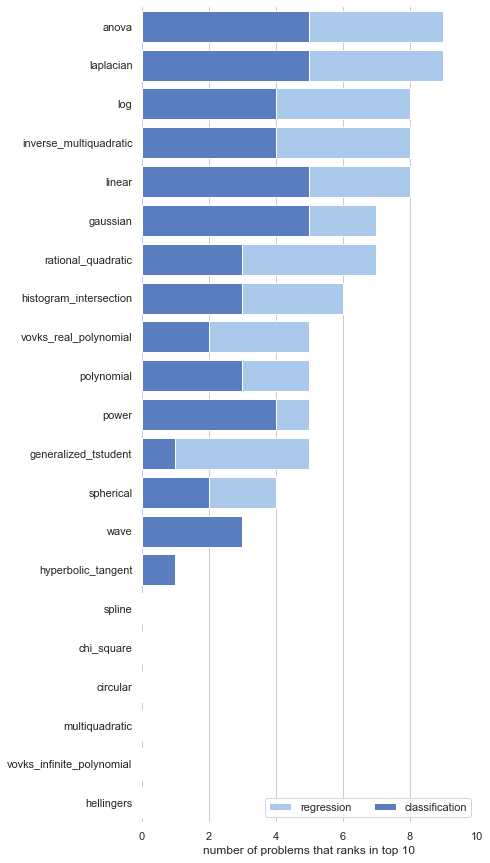

In [43]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total_count", y="kernel", data=table,
            label="regression", color="b")

# Plot the crashes where alcohol was involved\
sns.set_color_codes("muted")
sns.barplot(x="cls_count", y="kernel", data=table,
            label="classification", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="",
       xlabel="number of problems that ranks in top 10")
sns.despine(left=True, bottom=True)